# Customer Segmentation Case Study

## 1. Problem Definition


- NZ Airline has a frequent flyer program. NZA is in possession of a lot of data about the behavior of their FFP customers.NZA wishes to develop meaningful customer segments using the FFP behavior data.

**Objective**
- NZA will use the profile and size of customer segments to develop appropriate marketing and promotional programs to improve their revenues, and satisfy their customers better.

**Variable decription:**

1.  FFP#               - Frequent flyer program id
2.  AwardMiles         - Balance number of miles eligible for award travel
3.  EliteMiles         - Number of miles counted as qualifying for elite status
4.  PartnerMiles       - Number of miles earned from transactions while using partner’s services in the past 12 months
5.  PartnerTrans       - Number of transactions made at partner’s in the past 12 months
6.  FlyingReturnsMiles - Number of flight miles in the past 12 months
7.  FlightTrans        - Number of flight transactions in the past 12 months
8.  EnrollDuration     - Number of days since enrolled for FFP

In [ ]:
# Importing the required libraries

# To work with dataframes
import pandas as pd

# To perform numerical operations
import numpy as np

# To visualize data
import seaborn as sns
import matplotlib.pyplot as plt

# To scale variables
from sklearn.preprocessing import StandardScaler

# To identify pricipal components
from sklearn.decomposition import PCA 

# To perform K-Means Clustering
from sklearn import cluster

# To scale independent numerical variables
from sklearn.preprocessing import QuantileTransformer

# To perform Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# To perform DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE

# To produce dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Setting dimensions for plot

sns.set(rc = {'figure.figsize': (8, 8)})

## 2. Understanding Data

In [ ]:
ffp_data = pd.read_excel('FrequentFlyerProgram.xls',sheet_name='Data')

In [ ]:
ffp_data.head()

,FFP#,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration
0,1072,42040,1000,14189,17,4034,13,5717
1,1502,30486,0,0,0,0,0,5051
2,2307,85496,0,2799,7,2711,6,3820
3,3652,1884,0,0,0,0,0,31
4,815,42044,2253,11433,10,0,0,6140


In [ ]:
ffp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   FFP#                3999 non-null   int64
 1   AwardMiles          3999 non-null   int64
 2   EliteMiles          3999 non-null   int64
 3   PartnerMiles        3999 non-null   int64
 4   PartnerTrans        3999 non-null   int64
 5   FlyingReturnsMiles  3999 non-null   int64
 6   FlightTrans         3999 non-null   int64
 7   EnrollDuration      3999 non-null   int64
dtypes: int64(8)
memory usage: 250.1 KB


In [ ]:
# Dropping FFP#
ffp_data.drop('FFP#', axis = 1, inplace = True) 

In [ ]:
ffp_data.shape

(3999, 7)

In [ ]:
features = list(ffp_data.columns)
print(features)

['AwardMiles', 'EliteMiles', 'PartnerMiles', 'PartnerTrans', 'FlyingReturnsMiles', 'FlightTrans', 'EnrollDuration']


In [ ]:
ffp_data.describe()

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration
count,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [ ]:
# Setting options for legible output display

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
ffp_data.describe()

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration
count,3999.000,3999.000,3999.000,3999.000,3999.000,3999.000,3999.000
mean,73601.328,144.115,17144.846,11.602,460.056,1.374,4118.559
std,100775.665,773.664,24150.968,9.604,1400.209,3.793,2065.135
min,0.000,0.000,0.000,0.000,0.000,0.000,2.000
25%,18527.500,0.000,1250.000,3.000,0.000,0.000,2330.000
50%,43097.000,0.000,7171.000,12.000,0.000,0.000,4096.000
75%,92404.000,0.000,23800.500,17.000,311.000,1.000,5790.500
max,1704838.000,11148.000,263685.000,86.000,30817.000,53.000,8296.000


#### Understanding Data Summary
- Data is properly read into the dataframe 
- 'FFP#' column was removed
- info command shows that 
  1. There are 3999 samples and 8features
  2. There are no null values in any of the columns
  3. Data Type of each column confirms with the data present in that column
- Describe command shows that
  1. AwardMiles is spread between a minimum value of 0 and a maximum value of 1704838.Data distribution is skewed. 
  2. EliteMiles is spread between a minimum value of 0 and a maximum value of 11148.000. Data distribution is skewed.
  3. PartnerMiles is spread between a minimum value of 0 and a maximum value of 263685.Data distribution is skewed. 
  4. PartnerTrans is spread between a minimum value of 0 and a maximum value of 86.Slightly skewed distribution.
  5. FlyingReturnsMiles is spread between a minimum value of 0 and a maximum value of 30817.Skewed distribution
  6. FlightTrans is spread between a minimum value of 0 and a maximum value of 53.slightly Skewed distribution
  7. EnrollDuration is spread between a minimum value of 2 and a maximum value of 8296.Near Normal distribution.
  8. All features have outliers

## 3. Data Cleaning

In [ ]:
ffp_data.isnull().sum()

AwardMiles            0
EliteMiles            0
PartnerMiles          0
PartnerTrans          0
FlyingReturnsMiles    0
FlightTrans           0
EnrollDuration        0
dtype: int64

In [ ]:
ffp_data.duplicated() 

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998    False
Length: 3999, dtype: bool

#### Data Cleaning Summary
1. There are no null values in any of the columns
2. There are no duplicate records

## 4. Exploratory data analysis & Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f414b346d90>,
      dtype=object)

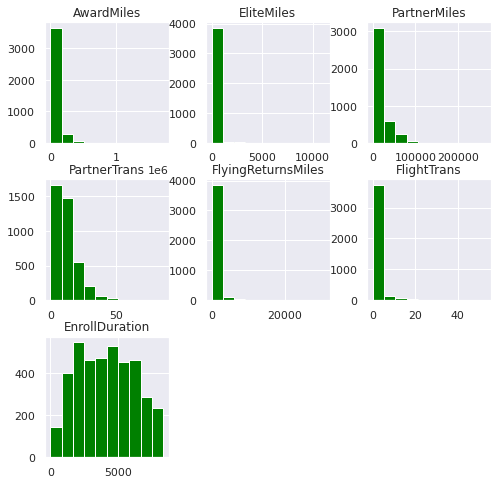

In [ ]:
ffp_data.hist(color ='green')

- Histograms doesn't show any clear cluster segregation

<Figure size 1080x1080 with 0 Axes>

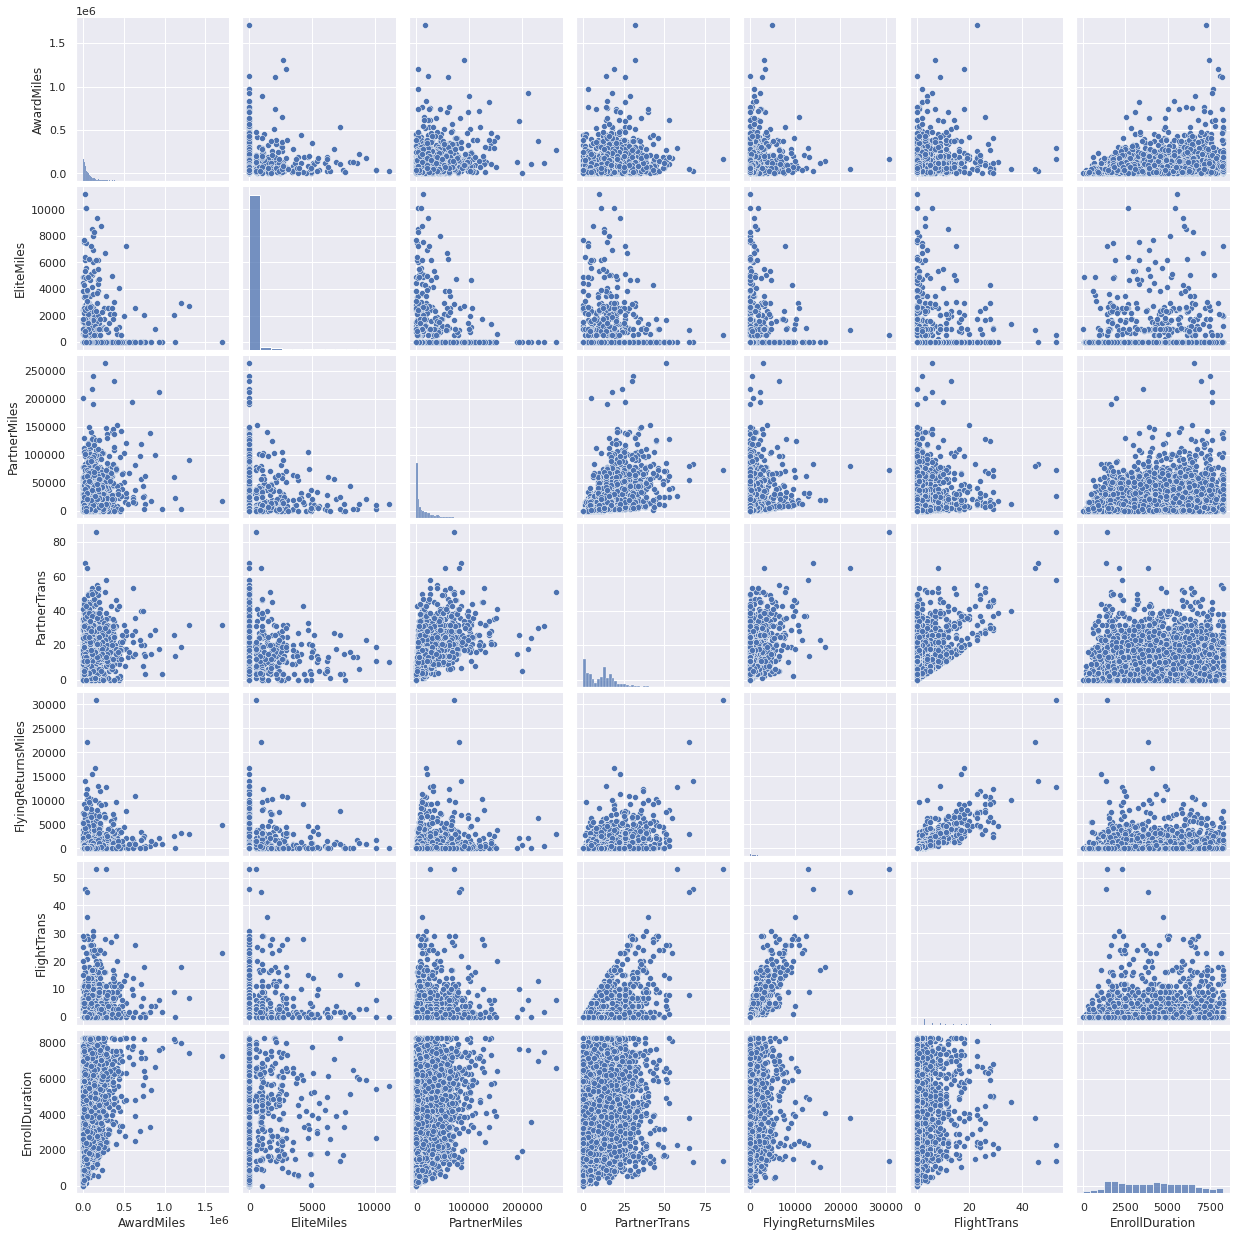

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(data=ffp_data)
plt.show()

- Pairplot helps in bivariate analysis
- EnrollDuration shows near normal distribution
- All other variables show skewed distribution
- There isn't any clear cluster segregation visible from pairplot
- There is positive correlation between FlightTrans and FlyingRetursMiles;PartnerTrans and PartnerMiles

#### AwardMiles

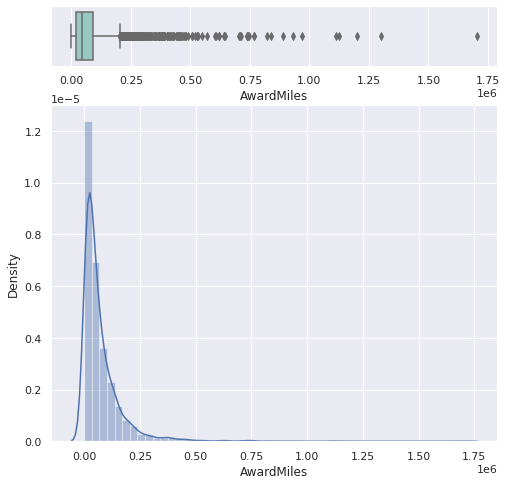

In [ ]:
f,(ax_box,ax_hist) = plt.subplots(2,gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(ffp_data['AwardMiles'],ax=ax_box,palette="Set3")
sns.distplot(ffp_data['AwardMiles'],ax=ax_hist,kde=True)

- AwardMiles distribution is slightly skewed
- Boxplot shows that there are outliers.

#### EliteMiles

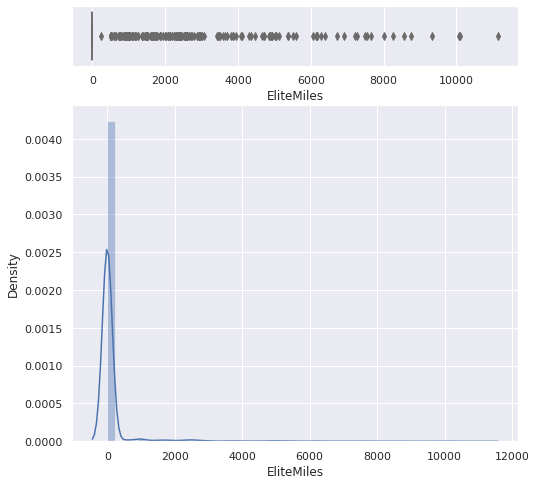

In [ ]:
f,(ax_box,ax_hist) = plt.subplots(2,gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(ffp_data['EliteMiles'],ax=ax_box,palette="Set3")
sns.distplot(ffp_data['EliteMiles'],ax=ax_hist,kde=True)

- EliteMiles distribution is skewed
- Boxplot shows that there are outliers.

#### PartnerMiles

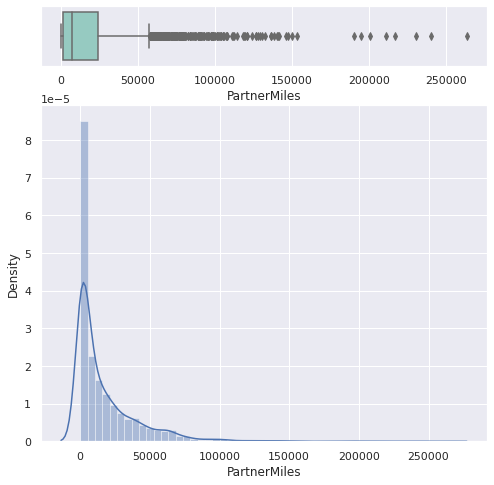

In [ ]:
f,(ax_box,ax_hist) = plt.subplots(2,gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(ffp_data['PartnerMiles'],ax=ax_box,palette="Set3")
sns.distplot(ffp_data['PartnerMiles'],ax=ax_hist,kde=True)

- Histogram shows skewed distribution
- Boxplot shows that there are outliers. 

#### PartnerTrans

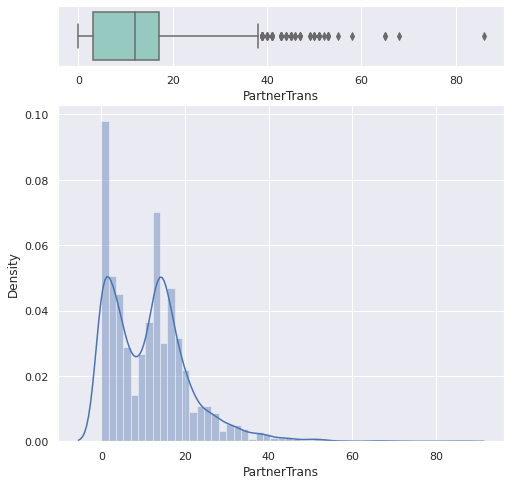

In [ ]:
f,(ax_box,ax_hist) = plt.subplots(2,gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(ffp_data['PartnerTrans'],ax=ax_box,palette="Set3")
sns.distplot(ffp_data['PartnerTrans'],ax=ax_hist,kde=True)

- Bimodal Histogram 
- Boxplot shows that there are outliers. 

#### FlyingReturnsMiles

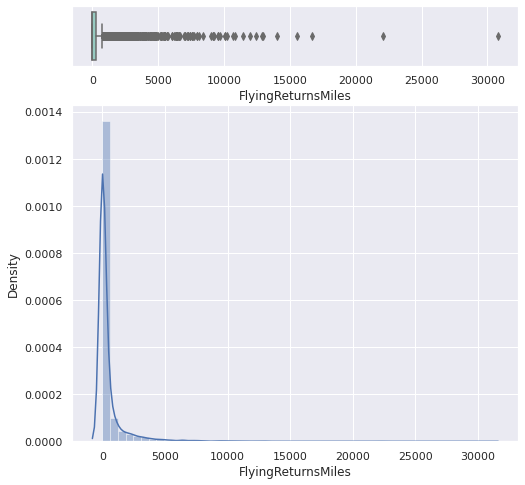

In [ ]:
f,(ax_box,ax_hist) = plt.subplots(2,gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(ffp_data['FlyingReturnsMiles'],ax=ax_box,palette="Set3")
sns.distplot(ffp_data['FlyingReturnsMiles'],ax=ax_hist,kde=True)

- Histogram shows right skewed distribution
- Boxplot shows that there are outliers. 

#### FlightTrans

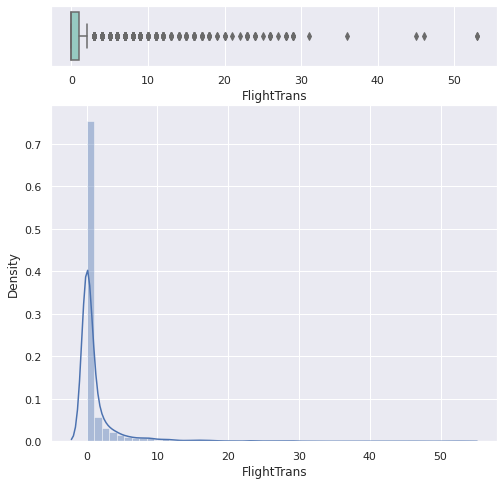

In [ ]:
f,(ax_box,ax_hist) = plt.subplots(2,gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(ffp_data['FlightTrans'],ax=ax_box,palette="Set3")
sns.distplot(ffp_data['FlightTrans'],ax=ax_hist,kde=True)

- Histogram shows right skewed distribution
- Boxplot shows that there are outliers. 

#### EnrollDuration

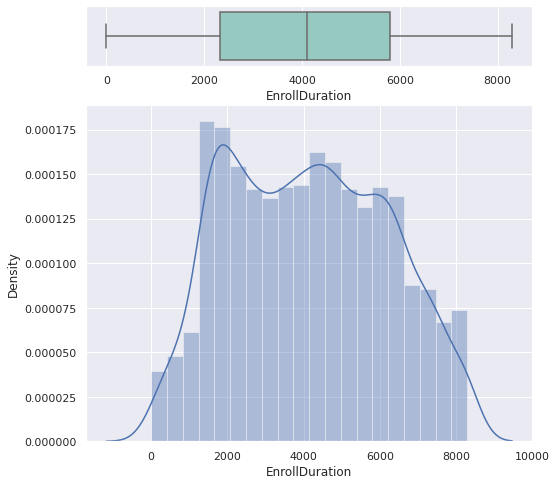

In [ ]:
f,(ax_box,ax_hist) = plt.subplots(2,gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(ffp_data['EnrollDuration'],ax=ax_box,palette="Set3")
sns.distplot(ffp_data['EnrollDuration'],ax=ax_hist,kde=True)

- Multimodal Histogram 
- Boxplot shows that there are no outliers. 

##### From BoxPlot and Statistical Summary, it is evident that there are lots of outliers in all features except EnrollDuration. For the following analysis, outliers will be retained, as these values are valid.

### Pearson's Correlation

In [ ]:
# Correlation
correlation = ffp_data.corr()
round(correlation, 3)

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration
AwardMiles,1.000,0.109,0.403,0.325,0.218,0.256,0.263
EliteMiles,0.109,1.000,0.031,0.051,0.127,0.144,0.017
PartnerMiles,0.403,0.031,1.000,0.603,0.184,0.185,0.210
PartnerTrans,0.325,0.051,0.603,1.000,0.377,0.432,0.161
FlyingReturnsMiles,0.218,0.127,0.184,0.377,1.000,0.869,0.037
FlightTrans,0.256,0.144,0.185,0.432,0.869,1.000,0.059
EnrollDuration,0.263,0.017,0.210,0.161,0.037,0.059,1.000


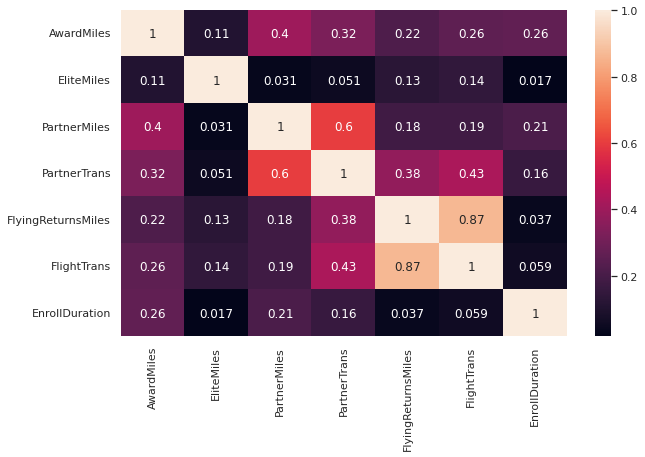

In [ ]:
# Correlation HeatMap
plt.figure(figsize=(10, 6))
sns.heatmap(data=correlation, annot=True)
plt.show()

- From Correlation and Heatmap it is evident that there is positive correlation between PartnerTrans and PartnerMiles;FlightTrans and FlyingReturnsMiles

## 5. Predictive Modeling

In [ ]:
# Function to find optimim K Value
def findk(df):
    distortions = []  

    for i in range(1, 11):
        km = cluster.KMeans(n_clusters=i,
                init='k-means++',
                n_init = 10,
                max_iter = 300,
                random_state = 0)
        km.fit(df.values)
        distortions.append(km.inertia_)

    #Plotting the K-means Elbow plot
    plt.figure(figsize = (7,7)) 
    plt.plot(range(1,11), distortions, marker='o')
    plt.title('ELBOW PLOT')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

In [ ]:
# Function to Scale variables
def scale_function(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.values)
    return scaled_data

In [ ]:
# Function to perform K-Means Clustering
def kmeans_function(data,k):
    km = cluster.KMeans(n_clusters=k,
                init='k-means++',
                n_init = 10,
                max_iter = 300,
                random_state = 0)
    km.fit(data.values)
    label = km.labels_
    return label,data

In [ ]:
# Function Performs Hierarchical Clustering
def hierarchical_function(data,k):
    h_cluster = AgglomerativeClustering(n_clusters=k, 
                                    affinity='euclidean',
                                    linkage='ward').fit(data)

    labels = h_cluster.labels_
    return labels,data

In [ ]:
# Function Performs DBScan Clustering
def dbscan_function(data,eps,minPts):
    cluster = DBSCAN(eps=eps, min_samples=minPts).fit(data)
    labels = cluster.labels_
    
    #identifying the points which makes up our core points
    sample_cores=np.zeros_like(labels,dtype=bool)

    sample_cores[cluster.core_sample_indices_]=True

    #Calculating the number of clusters

    n_clusters=len(set(labels))- (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("No. of clusters: ",n_clusters)

    print("Score: ",metrics.silhouette_score(data,labels))
    # y_pred = cluster.fit_predict(data)
    # plt.scatter(data[:,0], data[:,1],c=y_pred, cmap='Paired')
    # plt.title("DBSCAN")

    return labels,data

## 6. K Means Clustering
- these features are correlated with PartnerMiles and FlyingReturnsMiles respectively

In [ ]:
reduced_data = ffp_data.copy()

In [ ]:
reduced_data.drop(['PartnerTrans','FlightTrans'], axis = 1, inplace = True)

In [ ]:
features_reduced = reduced_data.columns

In [ ]:
scaled_reduced = scale_function(reduced_data)
model_data_reduced = pd.DataFrame(scaled_reduced,columns = features_reduced)

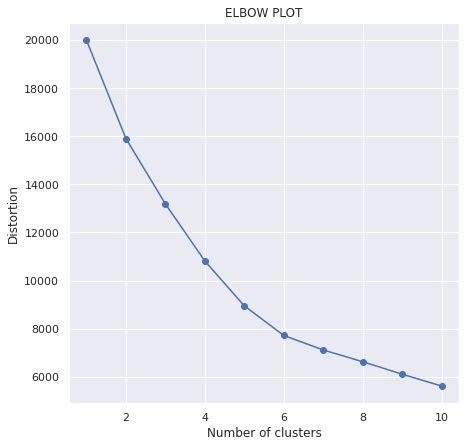

In [ ]:
findk(model_data_reduced)

In [ ]:
labels_km_reduced, km_data_reduced = kmeans_function(model_data_reduced,3)

In [ ]:
km_data_reduced['labels'] = labels_km_reduced

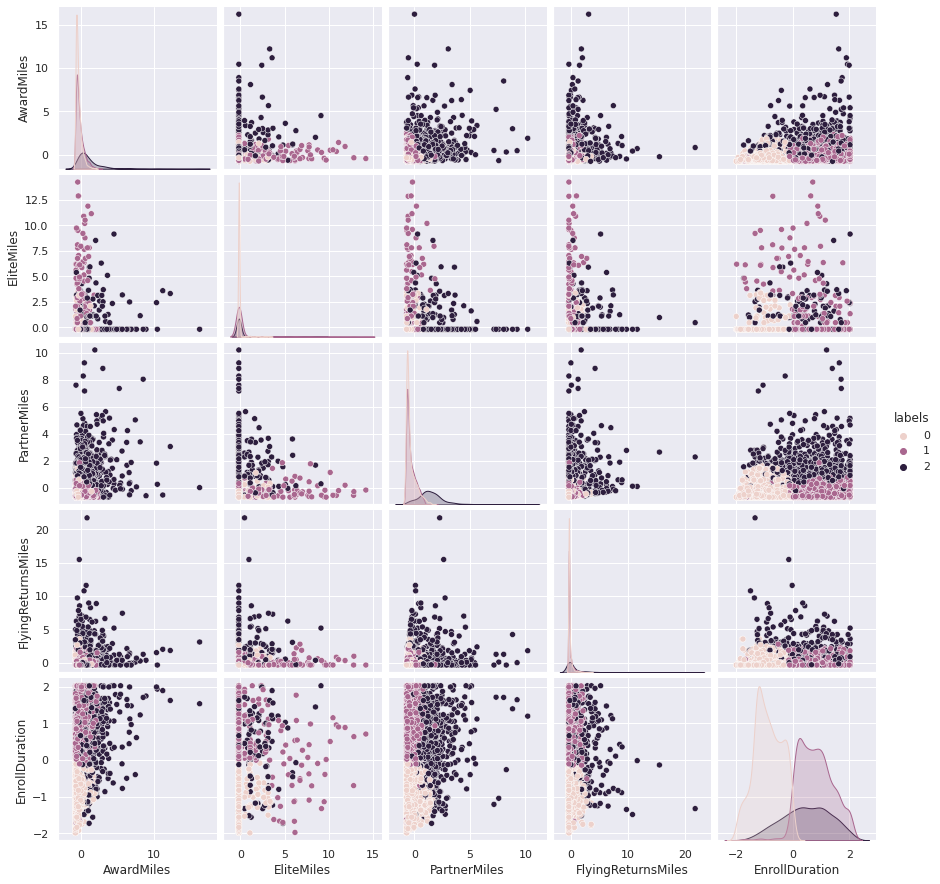

In [ ]:
sns.pairplot(km_data_reduced, x_vars = features_reduced, y_vars = features_reduced, hue='labels', diag_kind='kde')
plt.show()

In [ ]:
cluster_df1 = pd.concat([reduced_data[km_data_reduced['labels']==0].mean(), 
                  reduced_data[km_data_reduced['labels']==1].mean(), 
                  reduced_data[km_data_reduced['labels']==2].mean()],
                  axis=1)
cluster_df1.columns = ['cluster1','cluster2','cluster3']

In [ ]:
# Setting options for legible output display

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
cluster_df1

,cluster1,cluster2,cluster3
AwardMiles,111453.000,44452.185,185823.141
EliteMiles,4381.553,25.820,107.387
PartnerMiles,18042.766,8937.374,49919.137
FlyingReturnsMiles,1315.021,233.640,1264.137
EnrollDuration,4013.851,3751.812,5600.519


In [ ]:
# categorising Data Based on FlyingReturnsMiles
customer_type = ['High-Flyers','Low-Flyers','Medium-Flyers']
reduced_data['labels'] = labels_km_reduced
reduced_data['labels'] = reduced_data['labels'].astype('object')
reduced_data['labels'] = reduced_data['labels'].map({0:customer_type[0],1:customer_type[1],2:customer_type[2]})

#### K-Means Clustering on reduced data is giving overlapping clusters

## 7. Hierarchical Clustering

In [ ]:
h_reduced_data = ffp_data.copy()

In [ ]:
h_reduced_data.drop(['PartnerTrans','FlightTrans'], axis = 1, inplace = True)

In [ ]:
features_reduced = h_reduced_data.columns

In [ ]:
scaled_reduced = scale_function(h_reduced_data)
model_data_reduced = pd.DataFrame(scaled_reduced,columns = features_reduced)

In [ ]:
labels_h_reduced,hcluster_data_reduced = hierarchical_function(model_data_reduced,3)

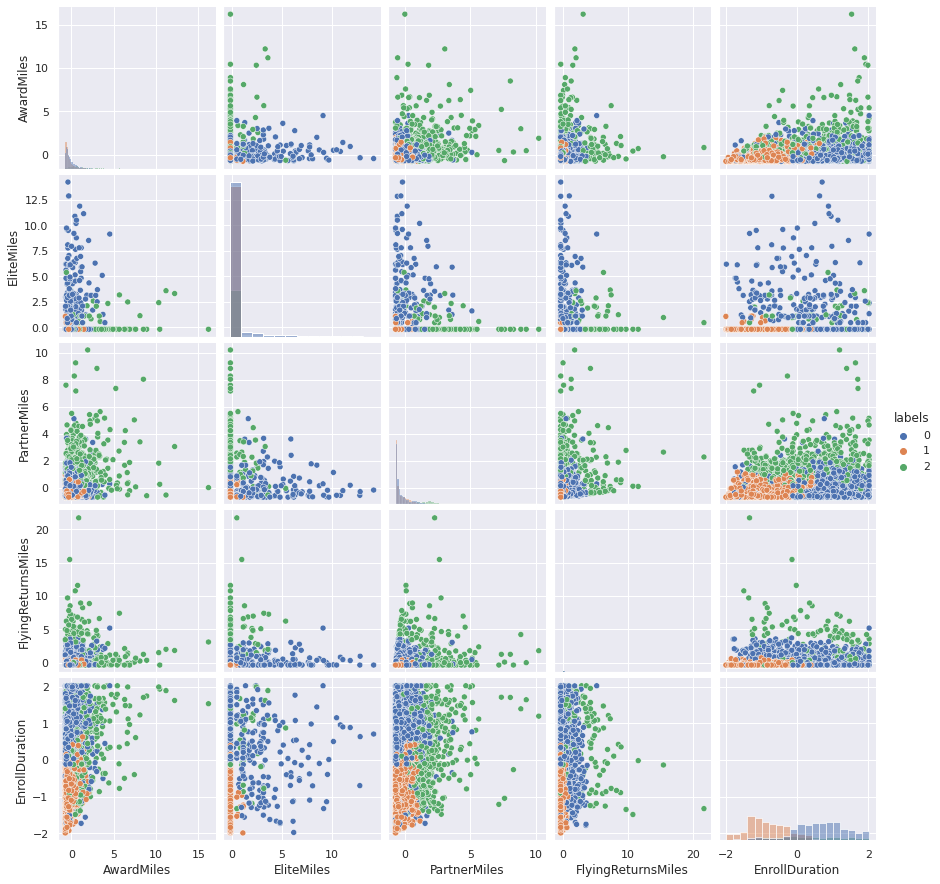

In [ ]:
hcluster_data_reduced['labels'] = labels_h_reduced
hcluster_data_reduced['labels'] = hcluster_data_reduced['labels'].astype('str')

sns.pairplot(hcluster_data_reduced,x_vars = features_reduced,y_vars = features_reduced,
             hue='labels',diag_kind='hist')
plt.show()

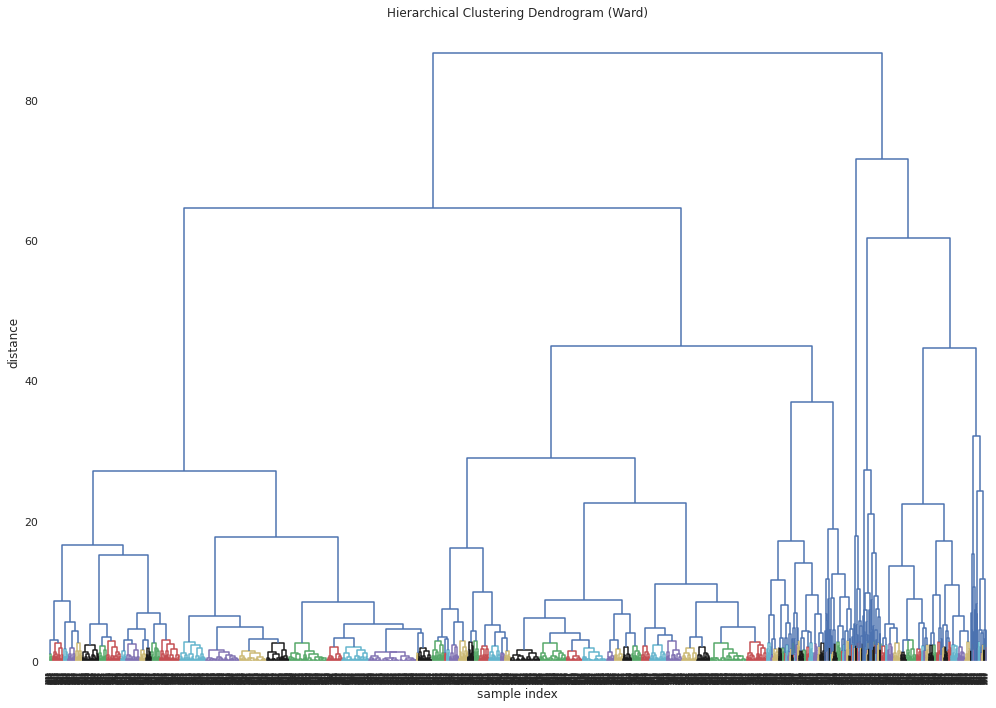

In [ ]:
linkage_matrix = linkage(hcluster_data_reduced, 'ward')
figure = plt.figure(figsize=(14, 10))
dendrogram(linkage_matrix,color_threshold=3)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

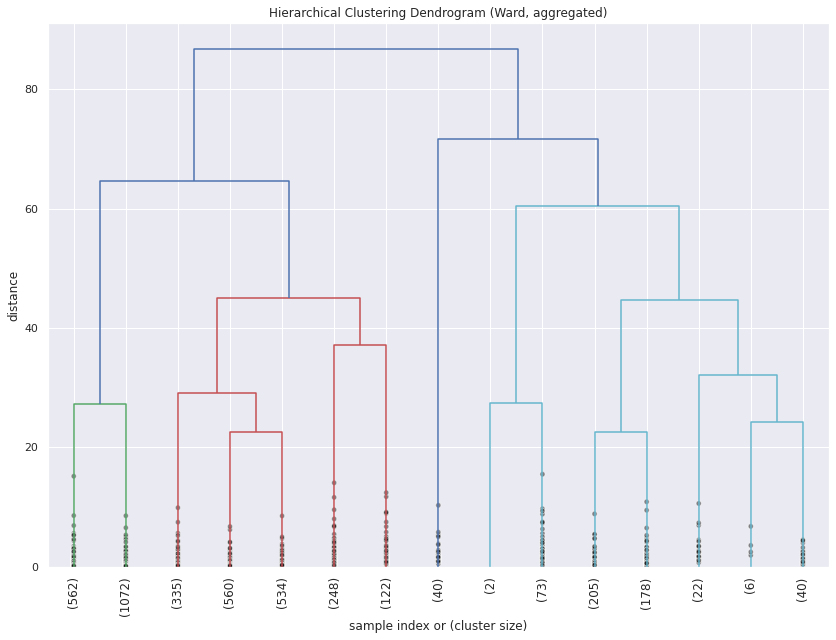

In [ ]:
figure = plt.figure(figsize=(14,10))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=15,                   # fixing 'p'
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True),  # to get a distribution impression in truncated branches
        
plt.title('Hierarchical Clustering Dendrogram (Ward, aggregated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

In [ ]:
hcluster_rd = pd.concat([h_reduced_data[hcluster_data_reduced['labels']=='0'].mean(), 
                  h_reduced_data[hcluster_data_reduced['labels']=='1'].mean(), 
                  h_reduced_data[hcluster_data_reduced['labels']=='2'].mean()],
                  axis=1)
hcluster_rd.columns = ['cluster1','cluster2','cluster3']

In [ ]:
# Setting options for legible output display

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
hcluster_rd

,cluster1,cluster2,cluster3
AwardMiles,53946.501,200530.008,91364.650
EliteMiles,80.756,94.778,6230.625
PartnerMiles,10621.867,59961.048,13946.450
FlyingReturnsMiles,308.754,1424.791,759.300
EnrollDuration,4009.403,4826.447,4178.175


In [ ]:
# categorising Data Based on FlyingReturnsMiles
customer_type = ['Low-Flyers','High-Flyers','Medium-Flyers']
h_reduced_data['labels'] = labels_h_reduced
h_reduced_data['labels'] = h_reduced_data['labels'].astype('object')
h_reduced_data['labels'] = h_reduced_data['labels'].map({0:customer_type[0],1:customer_type[1],2:customer_type[2]})

 Agglomerative Clustering on reduced data is giving overlapping clusters

## 8. DBScan

In [ ]:
reduced_data = ffp_data.copy()
reduced_data.drop(['PartnerTrans','FlightTrans'], axis = 1, inplace = True)
scaled_data = scale_function(reduced_data)
features_reduced = reduced_data.columns
dbscan_data = pd.DataFrame(scaled_data,columns = features_reduced)

In [ ]:
dbscan_data.head()

,AwardMiles,EliteMiles,PartnerMiles,FlyingReturnsMiles,EnrollDuration
0,-0.313223,1.106414,-0.122406,2.552755,0.774110
1,-0.427888,-0.186299,-0.709992,-0.328603,0.451572
2,0.118046,-0.186299,-0.594081,1.607778,-0.144589
3,-0.711742,-0.186299,-0.709992,-0.328603,-1.979566
4,-0.313183,2.726183,-0.236535,-0.328603,0.978964


In [ ]:
from itertools import product

eps_values = np.linspace(0.1,1, num = 10) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [ ]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(dbscan_data)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(dbscan_data, DBS_clustering.labels_))

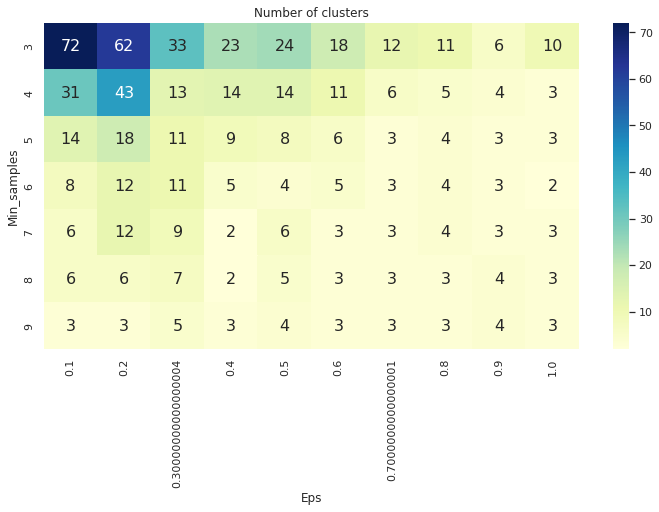

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

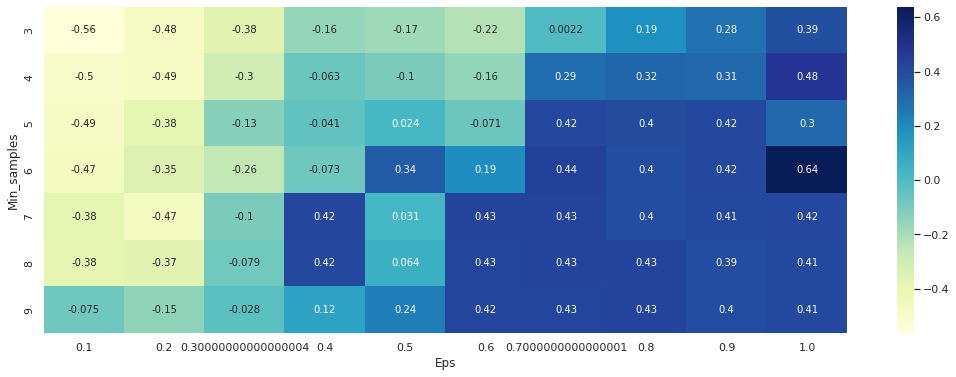

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [ ]:
labels_dbscan,data_dbscan, core_samples_mask = dbscan_function(dbscan_data,1.3,5)

No. of clusters:  4
Score:  0.5741887810685496


In [ ]:
data_dbscan['labels'] = labels_dbscan

In [ ]:
n_clusters=len(set(labels_dbscan))- (1 if -1 in labels_dbscan else 0)
n_noise_ = list(labels_dbscan).count(-1)
print("Noise points: ", n_noise_,"out of", len(list(labels_dbscan)))

Noise points:  153 out of 3999


##### Visualise dbscan


In [ ]:
df = data_dbscan.copy()

In [ ]:
X_embedded = TSNE(n_components=2).fit_transform(df)

In [ ]:
df["x_component"]=X_embedded[:,0]
df["y_component"]=X_embedded[:,1]

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(df, x="x_component", y="y_component", color = "labels", size_max=60)
fig.update_layout(height=800)
fig.show()

##### Estimating minPts and epsilon radius

In [ ]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(dbscan_data)
distances, indices = neighbors_fit.kneighbors(dbscan_data)

Text(0, 0.5, 'Epsilon')

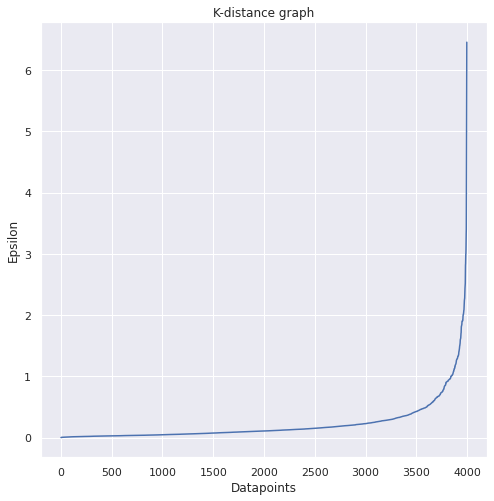

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance graph')
plt.xlabel('Datapoints')
plt.ylabel('Epsilon')